In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

/Users/zhangben/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# Function for representing data in a linear form
def split_ap(values, period):
    l = list(values)
    split_list = lambda n: zip(*[iter(l + [None] * ((n - len(l) % n) % n))] * n)
    l = list(split_list(period))
    ap = []
    for i in l:
        ap.append(sum(i))
    temp = [0]
    for i in ap:
        b = temp[-1] + i
        temp.append(b)
    return temp[1:]

In [112]:
predata = pd.read_csv('corn_OHLC2013-2017.txt', delimiter=',', header=0, names=['date', 'open', 'high', 'low', 'close'])
predata.index = pd.bdate_range(start=predata.date.values[0], periods=len(predata), freq='7D')
predata.drop('date', axis=1, inplace=True)

data = pd.DataFrame()
data['open'] = split_ap(predata.open.values,1)
data['high'] = split_ap(predata.high.values,1)
data['low'] = split_ap(predata.low.values,1)
data['close'] = split_ap(predata.high.values,1)
data.index = predata.index

# parameter selection for SARIMA
ps = range(0, 3)
d = [1,2]
qs = range(0, 2)
Ps = range(0, 2)
D = [1,2]
Qs = range(0, 3)

from itertools import product

parameters = product(ps, d, qs, Ps, D, Qs)
parameters_list = list(parameters)
len(parameters_list)

period = 53

best_mape = float("inf")

for param in tqdm(parameters_list):

    # try except is needed, because on some sets of parameters the model is not trained
    try:
        model = sm.tsa.statespace.SARIMAX(data.open[:-period], order=(param[0], param[1], param[2]),
                                          seasonal_order=(param[3], param[4], param[5], 12)).fit(disp=-1)
    
    except ValueError:
        continue
    except np.linalg.linalg.LinAlgError:
        continue
        
    forecast = model.forecast(steps=period)
    y_true, y_pred = data.values[-3:-1], forecast.values[-3:-1]
    print(y_true)
    print(y_pred)
    break
    mape = round((np.mean(np.abs((y_true - y_pred) / y_true)) * 100), 2)
    # save the best model, aic, parameters
    if mape < best_mape:
        best_model = model
        best_mape = mape
        best_param = param
    

warnings.filterwarnings('default')

  0%|          | 0/144 [00:00<?, ?it/s]

[[ 1262.87734   1275.820125  1250.216025  1275.820125]
 [ 1266.40334   1279.373625  1253.719525  1279.373625]]
[ 1259.93625383  1263.70451483]


In [55]:
#Loadind the dataset 
traindf = pd.read_csv('train_2.csv')
traindf = traindf.fillna(0)

In [59]:
traindftrans = traindf.transpose()

In [70]:
traindftrans.drop('Page', inplace = True)

In [81]:
# Transform time series type
traindftrans.index = pd.bdate_range(start=traindftrans.index.values[0], periods=len(traindftrans), freq='D') #freq define timegaps
traindftrans

,0,1,2,3,4,5,6,7,8,9,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
2015-07-01,18,11,1,35,0,12,0,118,5,6,...,0,0,0,0,0,0,0,0,0,0
2015-07-02,11,14,0,13,0,7,0,26,23,3,...,0,0,0,0,0,0,0,0,0,0
2015-07-03,5,15,1,10,0,4,0,30,14,5,...,0,0,0,0,0,0,0,0,0,0
2015-07-04,13,18,1,94,0,5,0,24,12,12,...,0,0,0,0,0,0,0,0,0,0
2015-07-05,14,11,0,4,0,20,0,29,9,6,...,0,0,0,0,0,0,0,0,0,0
2015-07-06,9,13,4,26,0,8,0,127,9,5,...,0,0,0,0,0,0,0,0,0,0
2015-07-07,9,22,0,14,0,5,0,53,35,4,...,0,0,0,0,0,0,0,0,0,0
2015-07-08,22,11,3,9,0,17,0,37,15,13,...,0,0,0,0,0,0,0,0,0,0
2015-07-09,26,10,4,11,0,24,0,20,14,9,...,0,0,0,0,0,0,0,0,0,0
2015-07-10,24,4,4,16,0,7,0,32,22,15,...,0,0,0,0,0,0,0,0,0,0


In [114]:
data = pd.DataFrame()
data['test'] = split_ap(traindftrans[0].values,1)
data.index = traindftrans.index

In [115]:
# parameter selection for SARIMA
ps = range(0, 3)
d = [1,2]
qs = range(0, 2)
Ps = range(0, 2)
D = [1,2]
Qs = range(0, 3)

from itertools import product

parameters = product(ps, d, qs, Ps, D, Qs)
parameters_list = list(parameters)
len(parameters_list)

period = 60 #totally 803days, we predict last 60days

best_smape = float("inf")

In [116]:
data.test[:-period]  #改float为int？？？

2015-07-01       18.0
2015-07-02       29.0
2015-07-03       34.0
2015-07-04       47.0
2015-07-05       61.0
2015-07-06       70.0
2015-07-07       79.0
2015-07-08      101.0
2015-07-09      127.0
2015-07-10      151.0
2015-07-11      170.0
2015-07-12      180.0
2015-07-13      194.0
2015-07-14      209.0
2015-07-15      217.0
2015-07-16      233.0
2015-07-17      241.0
2015-07-18      249.0
2015-07-19      265.0
2015-07-20      272.0
2015-07-21      283.0
2015-07-22      293.0
2015-07-23      313.0
2015-07-24      331.0
2015-07-25      346.0
2015-07-26      360.0
2015-07-27      409.0
2015-07-28      419.0
2015-07-29      435.0
2015-07-30      453.0
               ...   
2017-06-13    16433.0
2017-06-14    16459.0
2017-06-15    16494.0
2017-06-16    16526.0
2017-06-17    16555.0
2017-06-18    16593.0
2017-06-19    16639.0
2017-06-20    16661.0
2017-06-21    16689.0
2017-06-22    16715.0
2017-06-23    16744.0
2017-06-24    16765.0
2017-06-25    16788.0
2017-06-26    16811.0
2017-06-27

In [118]:
# Approximated differentiable SMAPE
def differentiable_smape(true, predicted):
    epsilon = 0.1
    true_o = true
    pred_o = predicted
    summ = np.maximum(np.abs(true_o) + np.abs(pred_o) + epsilon, 0.5 + epsilon)
    smape = np.abs(pred_o - true_o) / summ
    return smape

# SMAPE, rounded up to the closest integet
def rounded_smape(true, predicted):
    true_o = np.int(np.round(true))
    pred_o = np.round(predicted).astype(np.int32)
    summ = np.abs(true_o) + np.abs(pred_o)
    smape = np.where(summ==0, 0, np.abs(pred_o - true_o) / summ)
    return smape

# SMAPE as Kaggle calculates it
def kaggle_smape(true, predicted):
    true_o = true
    pred_o = predicted
    summ = np.abs(true_o) + np.abs(pred_o)
    smape = np.where(summ==0, 0, np.abs(pred_o - true_o) / summ)
    return smape

# MAE on log1p
def mae(true, predicted):
    true_o = np.log1p(true)
    pred_o = np.log1p(predicted)
    error = np.abs(true_o - pred_o)/2
    return error

In [119]:
for param in tqdm(parameters_list):
    
    # try except is needed, because on some sets of parameters the model is not trained
    try:
        model = sm.tsa.statespace.SARIMAX(data.test[:-period], order=(param[0], param[1], param[2]),
                                          seasonal_order=(param[3], param[4], param[5], 12)).fit(disp=-1)
    
    except ValueError:
        continue
    except np.linalg.linalg.LinAlgError:
        continue
        
    forecast = model.forecast(steps=period)   
    y_true, y_pred = data.values[-61:-1], forecast.values[-61:-1]

    mape = differentiable_smape(y_true[-1],y_pred[-1])

    # save the best model, aic, parameters
    if mape < best_smape:
        best_model = model
        best_mape = mape
        best_param = param
    

warnings.filterwarnings('default')




  1%|▏         | 2/144 [00:01<01:41,  1.41it/s]/Users/zhangben/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
  2%|▏         | 3/144 [00:07<05:48,  2.47s/it]/Users/zhangben/anaconda/lib/python3.6/site-packages/statsmodels/tsa/statespace/tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)
/Users/zhangben/anaconda/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:96: RuntimeWarning: invalid value encountered in maximum
  h = EPS**(1. / s) * np.maximum(np.abs(x), 0.1)
/Users/zhangben/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in maximum
  
100%|██████████| 144/144 [05:16<00:00,  2.19s/it]


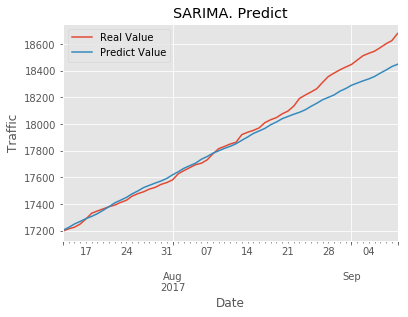

In [127]:
# make a forecast, visualize the result
forecast = best_model.get_prediction(start=pd.to_datetime(data.index.values[0]), end=pd.to_datetime(data.index.values[-1]), dynamic=False)
forecast = forecast.predicted_mean
predict = pd.DataFrame()
predict['Real Value'] = data.test[-period:-1]
predict["Predict Value"] = forecast
# predict["Predict Value"] = forecast - forecast.shift(1)
predict.dropna(inplace=True)

ax = predict.plot(title='SARIMA. Predict')
ax.set_xlabel('Date')
ax.set_ylabel('Traffic')
plt.show()